# Module 11 - Data Collection Challenge
## Deliverable 2: Scraping and Analyzing Mars Weather Data

In [11]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

browser = Browser('chrome')

### Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page with DevTools or Inspector to identify which elements to scrape.

In [12]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

> NOTE: This can also be achieved by using the Pandas `read_html` function, but we'll be using Beautiful Soup here to continue honing our web scraping skills.

In [13]:
# Create a Beautiful Soup Object
weather_soup = BeautifulSoup(browser.html, "html.parser")
print(weather_soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [25]:
# The webpage is a giant table, so we'll be extracting all rows of data
table_rows = weather_soup.select("tr")

for i in table_rows:
    print([j.text for j in i.select("td")])
    print("---")

[]
---
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
---
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
---
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
---
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
---
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
---
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
---
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
---
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
---
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
---
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
---
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
---
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
---
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
---
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
---
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
---
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
---
['171', '2

### Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. 

Explanation of the column headings ([units and details](https://data.world/the-pudding/mars-weather)):
* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Loop through the scraped data to create a list of rows
table_list = [[j.text for j in i.select("th, td")] for i in table_rows]
# It's a little hard to read, but each item in table_rows is one <tr> element
# For each of the <tr> elements, grab all <th> (first row of table) or <td> elements
# One iteration of i.select("th, td") yields multiple matches (returns a list), so we can't directly apply .text
# In a secondary loop, loop through the lists of matches and extract text information for each item in the list into a different list

table_list

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [35]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# We can get the header through table_list[0]
# And the rest of the content through table_list[1:]

mars_df = pd.DataFrame(table_list[1:], columns=table_list[0])

In [36]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Prepare Data for Analysis

Examine the data types that are currently associated with each column and, if necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

In [39]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [44]:
# Change data types for data analysis
mars_df[["sol", "ls", "month"]] = mars_df[["sol", "ls", "month"]].astype("int64")
mars_df[["min_temp", "pressure"]] = mars_df[["min_temp", "pressure"]].astype("float64")
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"], format="%Y-%m-%d")

In [45]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Analyze the Data

We want to analyze our dataset by using Pandas functions to answer the following questions:

1. How many days worth of data are there for each of the 12 Martian months?
2. How many Martian (not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
4. Which months have the lowest and the highest atmospheric pressure on Mars?
5. About how many terrestrial (Earth) days exist in a Martian year?


In [54]:
# 1. How many days worth of data are there for each of the 12 Martian months?
mars_df.groupby(["month"])["month"].count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [48]:
# 2. How many Martian days' worth of data are there?
len(mars_df)

1867

In [55]:
# 3. What is the average minimum temperature for each Martian month?
mars_df.groupby(["month"])["min_temp"].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

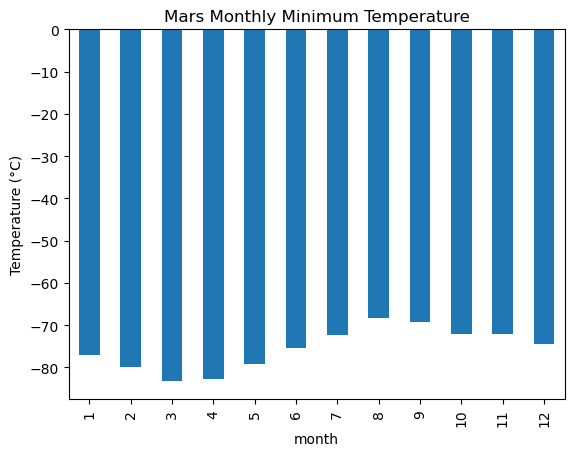

In [57]:
# Plot the average temperature by month
temp_df = mars_df.groupby(["month"])["min_temp"].mean()

temp_df.plot(kind="bar", x="month", y="min_temp")
plt.title("Mars Monthly Minimum Temperature")
plt.ylabel("Temperature (°C)")
plt.show()

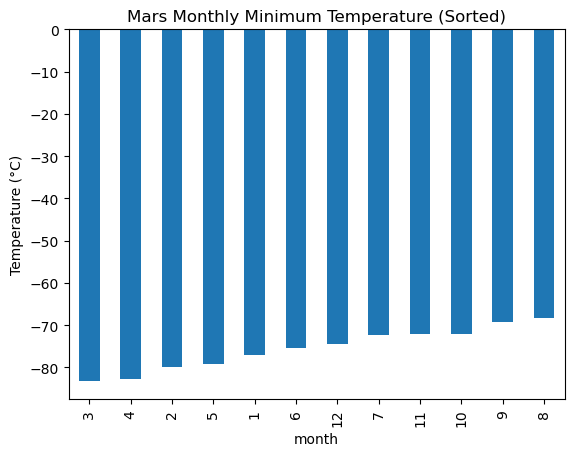

In [62]:
# Identify the coldest and hottest months in Curiosity's location
ordered_df = temp_df.sort_values(ascending=True)

ordered_df.plot(kind="bar", x="month", y="min_temp")
plt.title("Mars Monthly Minimum Temperature (Sorted)")
plt.ylabel("Temperature (°C)")
plt.show()

On average, the third month has the lowest minimum temperature on Mars and the eighth month has the highest.

In [63]:
# 4. What is the average pressure for each Martian month?
mars_df.groupby(["month"])["pressure"].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

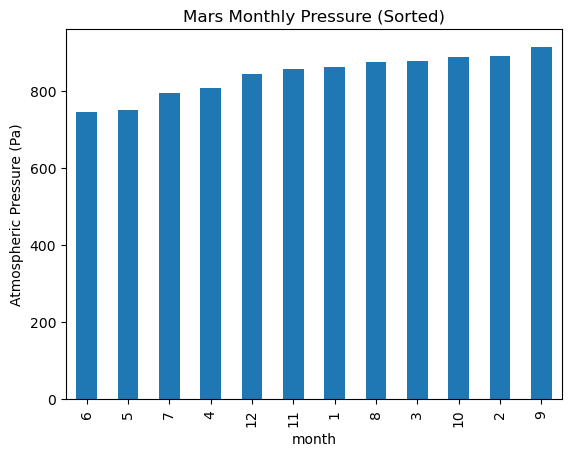

In [64]:
# Plot the average pressure by month
pres_df = mars_df.groupby(["month"])["pressure"].mean().sort_values(ascending=True)

pres_df.plot(kind="bar", x="month", y="pressure")
plt.title("Mars Monthly Pressure (Sorted)")
plt.ylabel("Atmospheric Pressure (Pa)")
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

For reference, Earth's standard atmospheric pressure is 101,325 Pa.

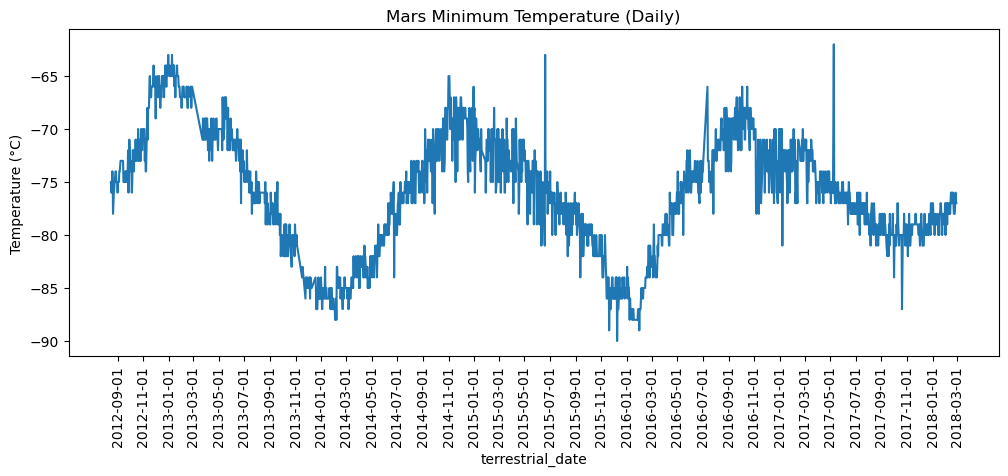

In [78]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# We can estimate that by seeing how many days exist in a seasonal cycle (time from peak temperature to peak temperature)

xticks = pd.date_range(mars_df["terrestrial_date"].min(), mars_df["terrestrial_date"].max().replace(month=mars_df["terrestrial_date"].max().month+1), freq="2MS")

mars_df.plot(x="terrestrial_date", y="min_temp", figsize = (12, 4.8), legend=None, xticks=xticks)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Mars Minimum Temperature (Daily)")
plt.ylabel("Temperature (°C)")
plt.show()

If we assume the peak of one year at January 2013 and the peak of another at November 2014, the distance from peak to peak on the temperature plot seems to be roughly 22 terrestrial months, or 670 terrestrial days. A year on Mars appears to be about terrestrial 670 days from the plot.

A quick Internet search confirms that a Mars year is equivalent to about 687 terrestrial days, so our eyeballed estimate is off by about half a terrestrial month.

### Save the Data

Export the DataFrame to a CSV file.

In [77]:
# Write the data to a CSV
mars_df.to_csv("Results/mars_weather.csv", index=False)

In [47]:
# Close your automated browsers
browser.quit()